# Student Number - 
## Machine Learning Assignment Spring 2024
### Forest Fire Prediction
#### Project Objective: Develop predictive models that will identify whether a forest fire will happen.

###### To attend to the Machine Learning assignment of forest fire predication I will using Python, 
###### below are the general steps considered:

In [14]:
#loading of all libraries which were required.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

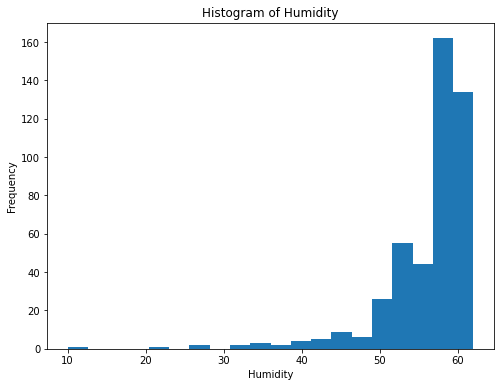

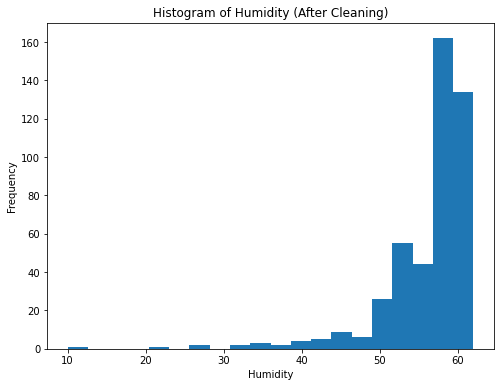

   collector.id  c.score   l.score      rain  tree.age  surface.litter  \
0             5    13.11  3.421591  0.477187     34.66        6.718047   
1             7    11.99  2.874611  0.212425     19.39        6.242029   
2             6    12.91  2.827774  0.118141     15.75        6.397929   
3             5    12.06  2.772961  0.097565     13.25        6.278146   
4             2    15.06  3.271684  0.438121     47.14        6.932448   

   wind.intensity  humidity  tree.density  month  fire  time.of.day_afternoon  \
0        3.335635      52.0       0.69860      8     1                    1.0   
1        3.127024      59.0       0.62020      4     0                    0.0   
2        3.052446      60.0       0.58235     10     0                    0.0   
3        3.114239      60.0       0.57025      9     1                    1.0   
4        3.214831      51.0       0.71150      7     1                    0.0   

   time.of.day_morning  time.of.day_night  
0                  0.0  

In [15]:
# Step 1: Data Exploration and Preprocessing
data = pd.read_csv('forestdata.csv')
# Explore and preprocess the data as needed
# Handle missing values, outliers, and categorical variables

#Identify missing values i will be using isnull() methods in pandas.
#To decide whether to impute missing values, drop rows/columns with missing values, or use advanced imputation techniques 
#like mean imputation.
missing_values = data.isnull().sum()
data.fillna(data.mean(), inplace=True)

# Handle outliers

import matplotlib.pyplot as plt

# Plot histogram of humidity
plt.figure(figsize=(8, 6))
plt.hist(data['humidity'], bins=20)
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

# Define thresholds for valid humidity values
min_humidity = 0
max_humidity = 100

# Replace out-of-range humidity values with NaN
data.loc[(data['humidity'] < min_humidity) | (data['humidity'] > max_humidity), 'humidity'] = float('NaN')

# Plot histogram again after cleaning
plt.figure(figsize=(8, 6))
plt.hist(data['humidity'].dropna(), bins=20)  # Drop NaN values for plotting
plt.title('Histogram of Humidity (After Cleaning)')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

#Handling categorical variables

# Select categorical variables to encode
categorical_features = ['time.of.day']

# Extract categorical variables from the dataset
categorical_data = data[categorical_features]

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(categorical_data)


# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names (categorical_features))

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

In [16]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['time.of.day'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variable
data['time.of.day'] = label_encoder.fit_transform(data['time.of.day'])

import category_encoders as ce

# Initialize TargetEncoder
target_encoder = ce.TargetEncoder()

# Encode categorical variable
data['month_encoded'] = target_encoder.fit_transform(data['month'], data['fire'])

data

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire,month_encoded
0,5,13.110,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,0,1,8
1,7,11.990,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,1,0,4
2,6,12.910,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,2,0,10
3,5,12.060,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,0,1,9
4,2,15.060,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,5,11.340,2.865292,0.094384,16.41,6.250168,3.271296,58.0,0.58278,3,0,0,3
452,10,13.700,2.847752,0.157058,20.64,6.531606,3.087569,60.0,0.59077,9,2,0,9
453,6,9.720,2.718282,0.000000,21.69,5.716370,2.926373,62.0,0.50000,2,0,0,2
454,9,13.170,2.962686,0.261034,14.49,6.607596,3.196904,52.0,0.66070,6,2,1,6


In [17]:
# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)
train_data

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire,month_encoded
334,2,10.170,2.748070,0.064115,34.620,5.909712,3.114239,61.0,0.52579,2,1,0,2
454,9,13.170,2.962686,0.261034,14.490,6.607596,3.196904,52.0,0.66070,6,2,1,6
207,9,12.680,3.063040,0.341600,36.460,6.789310,3.331221,52.0,0.67160,11,1,1,11
364,5,11.280,2.850348,0.238370,26.330,6.073045,3.147109,59.0,0.58611,8,2,0,8
276,4,11.760,2.793272,0.174702,49.110,6.316442,3.066129,61.0,0.57160,8,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,8,19.190,3.085482,0.480467,119.300,7.309881,3.061669,58.0,0.67770,9,0,1,9
184,2,17.750,3.270909,0.412177,43.950,7.270313,3.159421,53.0,0.69700,8,2,1,8
279,8,9.777,2.841389,0.088370,22.870,5.905362,3.183581,59.0,0.55334,4,0,0,4
359,3,13.050,2.720164,0.020711,32.960,6.436311,3.026764,62.0,0.51111,4,1,0,4


In [18]:
# Step 2: Model Building
X_train, y_train = train_data.drop(columns=['time.of.day']), train_data['time.of.day']
X_val, y_val = val_data.drop(columns=['time.of.day']), val_data['time.of.day']
X_test, y_test = test_data.drop(columns=['time.of.day']), test_data['time.of.day']

# Normalize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Train decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Train neural network model
nn_model = MLPClassifier()
nn_model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [19]:
# Step 3: Model Evaluation
lr_val_pred = lr_model.predict(X_val_scaled)
dt_val_pred = dt_model.predict(X_val)
nn_val_pred = nn_model.predict(X_val_scaled)

# Evaluate models using appropriate metrics

In [23]:
nn_val_pred

array([0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 1])

In [20]:
# Step 4: Visualization
import matplotlib.pyplot as plt

Visualize distribution of numeric variables using histograms
numeric_variables = ['humidity', 'tree_density', 'time.of.day']
data[numeric_variables].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

# Create infographic poster as per assignment requirements

# Step 5: Submission
# Submit the infographic poster

SyntaxError: invalid syntax (<ipython-input-20-51c40a654da0>, line 4)

In [22]:
dt_val_pred

array([1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1,
       0, 2, 1])